In [1]:

import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Configurar o estilo do seaborn
sns.set(style="whitegrid")

In [3]:
# Importando o df 
df = pd.read_excel("C+¦pia de aprovacao_alunos (1).xlsx")
df.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


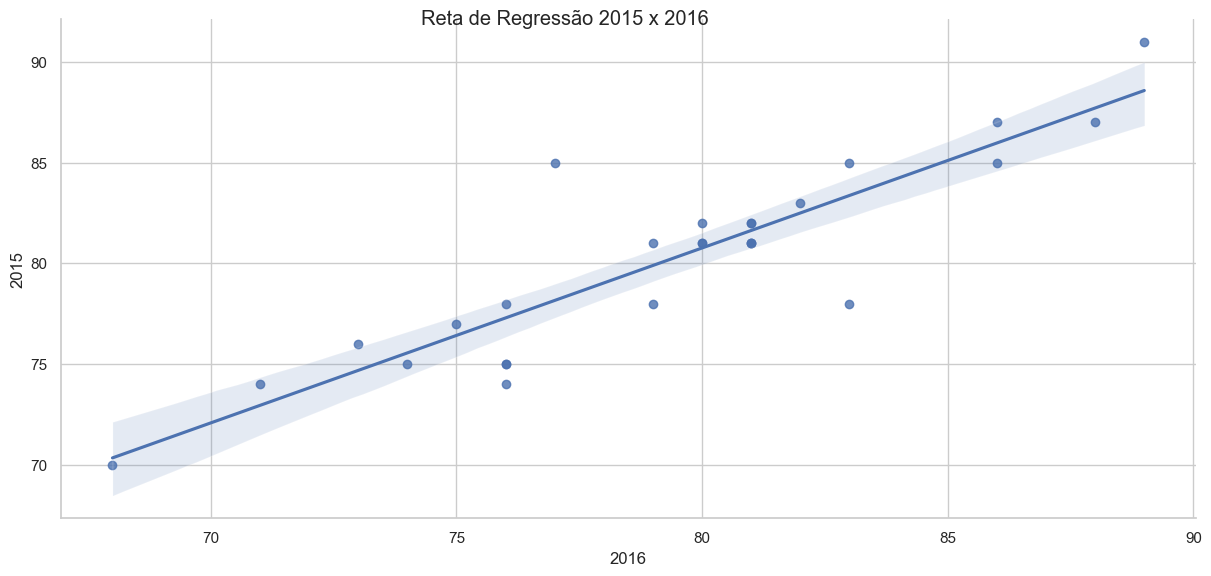

In [6]:
# Gráfico de reta da regressão 01
ax = sns.lmplot(x='ano_2015',y='ano_2016', data=df)
ax.fig.set_size_inches(14,6)

ax.fig.suptitle('Reta de Regressão 2015 x 2016 ')

ax.set_ylabels('2015')
ax.set_xlabels('2016')

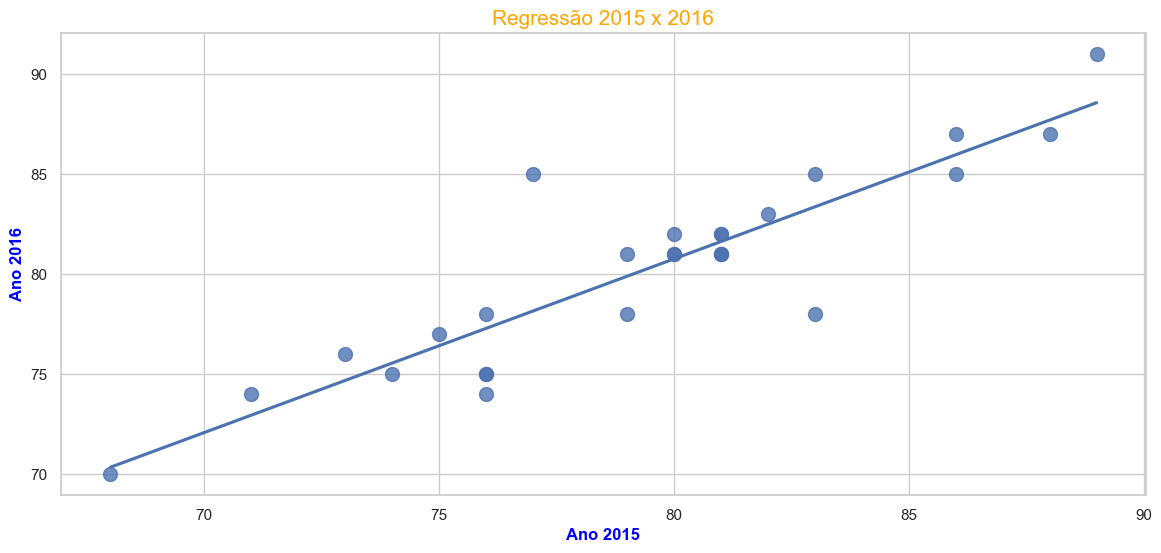

In [7]:
# Gráfico de reta da regressão 02

fig = plt.figure(figsize=(14,6))
sns.regplot(x='ano_2015', y='ano_2016', data=df, ci=None, scatter_kws={'s': 100})

plt.xlabel('Ano 2015',fontsize = 12, fontweight = 'bold', color = 'blue') 
plt.ylabel('Ano 2016',fontsize = 12, fontweight = 'bold', color = 'blue')
plt.title('Regressão 2015 x 2016', fontsize = 15, color= 'orange');


In [8]:
# Converter a coluna 'numeros' para string
df['UF'] = df['UF'].astype(str)

In [9]:
x = sm.add_constant(df.ano_2015)
y = df.ano_2016

In [10]:
result_regression = sm.OLS(y,x).fit()
print(result_regression.summary())

"""
r² = 0.801 
acima de 0.50 é bom 

const(primeiro ponto da reta) = 11.3143

multiplicador train (ano_2015) = 0.86
"""

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Fri, 12 Jul 2024   Prob (F-statistic):           3.02e-10
Time:                        14:55:48   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3143      6.880      1.645      0.1

'\nr² = 0.801 \nacima de 0.50 é bom \n\nconst(primeiro ponto da reta) = 11.3143\n\nmultiplicador train (ano_2015) = 0.86\n'

In [11]:
df['y_previsto'] = result_regression.predict()
df.head()


,UF,ano_2015,ano_2016,y_previsto
0,Rondonia,77,85,78.159571
1,Acre,79,81,79.895812
2,Amazonas,83,85,83.368294
3,Roraima,81,82,81.632053
4,Para,73,76,74.687089


In [12]:
df['resíduo'] = df['y_previsto'] - df['ano_2016']
df.head()

,UF,ano_2015,ano_2016,y_previsto,resíduo
0,Rondonia,77,85,78.159571,-6.840429
1,Acre,79,81,79.895812,-1.104188
2,Amazonas,83,85,83.368294,-1.631706
3,Roraima,81,82,81.632053,-0.367947
4,Para,73,76,74.687089,-1.312911
